# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '/Users/brian/Desktop/The 3rd Machine Learning Marathon/Day_008'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
app_train.shape

(307511, 122)

In [48]:
observe_data = app_train[['AMT_INCOME_TOTAL','NAME_INCOME_TYPE','CODE_GENDER','AMT_CREDIT','AMT_ANNUITY']]
observe_data.head(5)

,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,CODE_GENDER,AMT_CREDIT,AMT_ANNUITY
0,202500.0,Working,M,406597.5,24700.5
1,270000.0,State servant,F,1293502.5,35698.5
2,67500.0,Working,M,135000.0,6750.0
3,135000.0,Working,F,312682.5,29686.5
4,121500.0,Working,M,513000.0,21865.5


In [49]:
observe_data.groupby(observe_data['NAME_INCOME_TYPE']).mean()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
NAME_INCOME_TYPE,,,
Businessman,652500.000000,1.228500e+06,72675.000000
Commercial associate,202955.327289,6.699131e+05,30415.221067
Maternity leave,140400.000000,7.497000e+05,36986.400000
Pensioner,136401.292273,5.425461e+05,23900.400293
State servant,179737.969506,6.698193e+05,28864.490392
Student,170500.000000,5.107875e+05,25188.000000
Unemployed,110536.363636,7.643864e+05,28178.386364
Working,163169.889223,5.770110e+05,26492.651756


In [50]:
observe_data.groupby(observe_data['NAME_INCOME_TYPE']).describe()

AMT_INCOME_TOTAL                                          \
                                count           mean            std       min   
NAME_INCOME_TYPE                                                                
Businessman                      10.0  652500.000000  627226.035812  180000.0   
Commercial associate          71617.0  202955.327289  147974.151536   26550.0   
Maternity leave                   5.0  140400.000000  126856.907577   49500.0   
Pensioner                     55362.0  136401.292273   76650.331247   25650.0   
State servant                 21703.0  179737.969506  100880.579748   27000.0   
Student                          18.0  170500.000000  106644.682171   81000.0   
Unemployed                       22.0  110536.363636   88055.079059   26550.0   
Working                      158774.0  163169.889223  307577.685942   25650.0   

                                                                AMT_CREDIT  \
                           25%       50%       75%          max      count   
NAME_INCOME_TYPE                                                             
Businessman           225000.0  495000.0  843750.0    2250000.0       10.0   
Commercial associate  135000.0  180000.0  225000.0   18000090.0    71617.0   
Maternity leave        67500.0   90000.0  135000.0     360000.0        5.0   
Pensioner              90000.0  117000.0  166500.0    2250000.0    55362.0   
State servant         112500.0  157500.0  225000.0    3150000.0    21703.0   
Student               112500.0  157500.0  178875.0     562500.0       18.0   
Unemployed             54000.0   78750.0  135000.0     337500.0       22.0   
Working               112500.0  135000.0  202500.0  117000000.0   158774.0   

                                    ...                       AMT_ANNUITY  \
                              mean  ...        75%        max       count   
NAME_INCOME_TYPE                    ...                                     
Businessman           1.228500e+06  ...  2025000.0  2250000.0        10.0   
Commercial associate  6.699131e+05  ...   900000.0  4050000.0     71614.0   
Maternity leave       7.497000e+05  ...   810000.0  1435500.0         5.0   
Pensioner             5.425461e+05  ...   755190.0  3312162.0     55362.0   
State servant         6.698193e+05  ...   900000.0  3600000.0     21700.0   
Student               5.107875e+05  ...   637038.0  1381113.0        18.0   
Unemployed            7.643864e+05  ...   896625.0  1804500.0        22.0   
Working               5.770110e+05  ...   792346.5  4031032.5    158768.0   

                                                                              \
                              mean           std      min      25%       50%   
NAME_INCOME_TYPE                                                               
Businessman           72675.000000  64001.416000  11250.0  28687.5  56250.00   
Commercial associate  30415.221067  16242.685658   2052.0  19120.5  27780.75   
Maternity leave       36986.400000  25982.927987  11286.0  15750.0  40500.00   
Pensioner             23900.400293  13308.229053   1615.5  14503.5  21775.50   
State servant         28864.490392  15122.270873   2673.0  17775.0  26446.50   
Student               25188.000000  12094.633654   9000.0  19777.5  24828.75   
Unemployed            28178.386364  13277.604609   6750.0  20952.0  25240.50   
Working               26492.651756  13605.232726   1980.0  16452.0  24705.00   

                                            
                             75%       max  
NAME_INCOME_TYPE                            
Businessman           101250.000  225000.0  
Commercial associate   38511.000  258025.5  
Maternity leave        40896.000   76500.0  
Pensioner              29938.500  225000.0  
State servant          36864.000  225000.0  
Student                30190.500   60691.5  
Unemployed             38129.625   54954.0  
Working                33615.000  225000.0  

[8 rows x 24 columns]

In [51]:
observe_data.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657
AMT_CREDIT,0.156870,1.000000,0.770138
AMT_ANNUITY,0.191657,0.770138,1.000000


In [52]:
observe_data.cov()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
AMT_INCOME_TOTAL,5.622739e+10,1.497168e+10,6.587001e+08
AMT_CREDIT,1.497168e+10,1.619988e+11,4.492695e+09
AMT_ANNUITY,6.587001e+08,4.492695e+09,2.100684e+08


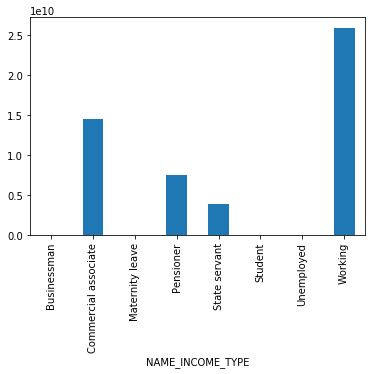

In [53]:
app_train.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].sum().plot(kind='bar')
plt.show()

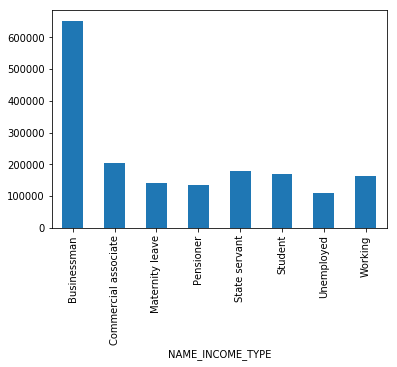

In [54]:
app_train.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().plot(kind='bar')
plt.show()

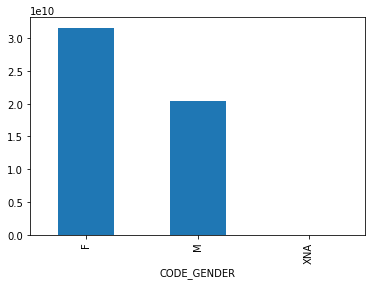

In [14]:
app_train.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].sum().plot(kind='bar')
plt.show()

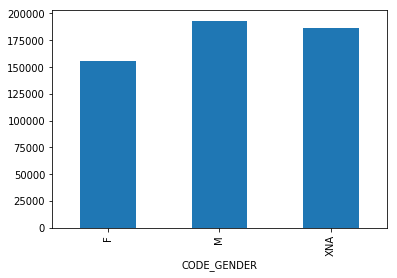

In [15]:
app_train.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].mean().plot(kind='bar')
plt.show()

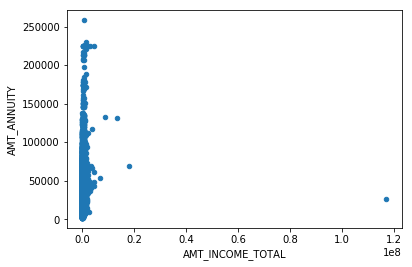

In [17]:
app_train.plot(kind='scatter', x='AMT_INCOME_TOTAL', y='AMT_ANNUITY')
plt.show()

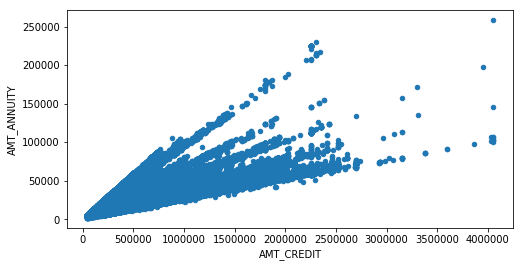

In [24]:
app_train.plot(kind='scatter', x='AMT_CREDIT', y='AMT_ANNUITY',figsize=(8,4))
plt.show()

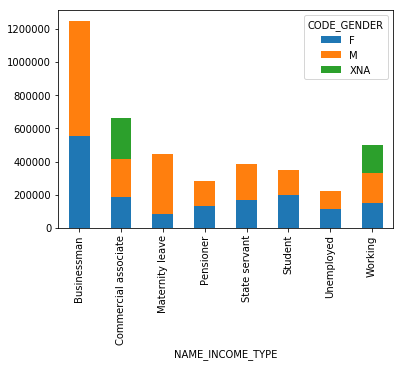

In [26]:
app_train.groupby(['NAME_INCOME_TYPE', 'CODE_GENDER'])['AMT_INCOME_TOTAL'].mean().unstack().plot(kind='bar', stacked=True)
plt.show()

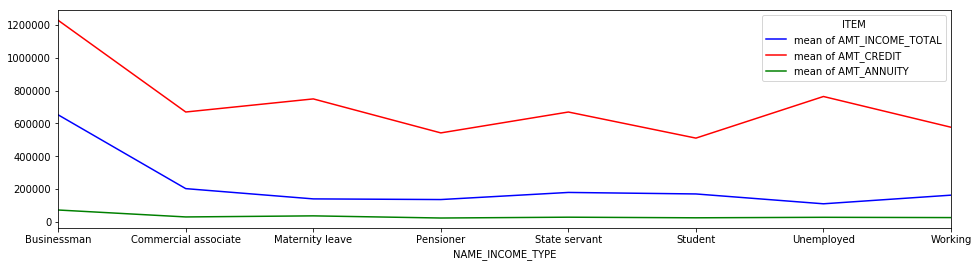

In [32]:
app_train.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().plot(kind='line', color='blue' ,figsize=(16,4), label='mean of AMT_INCOME_TOTAL')
app_train.groupby('NAME_INCOME_TYPE')['AMT_CREDIT'].mean().plot(kind='line',color='red', figsize=(16,4), label='mean of AMT_CREDIT')
app_train.groupby('NAME_INCOME_TYPE')['AMT_ANNUITY'].mean().plot(kind='line',color='green', figsize=(16,4), label='mean of AMT_ANNUITY')
plt.legend(title='ITEM')
plt.show()

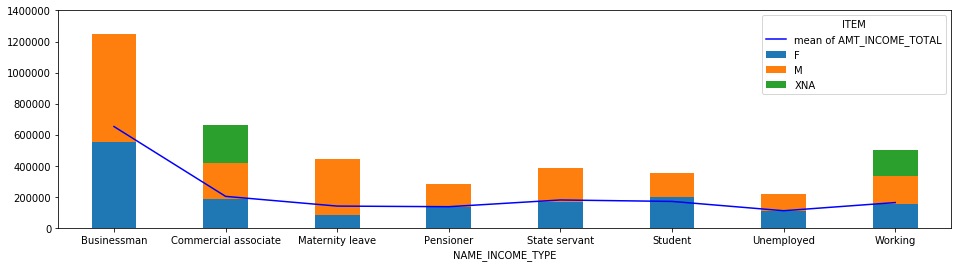

In [47]:
app_train.groupby(['NAME_INCOME_TYPE', 'CODE_GENDER'])['AMT_INCOME_TOTAL'].mean().unstack().plot(kind='bar', width=0.4, figsize=(16,4), stacked=True)
app_train.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().plot(kind='line', xlim=([-0.5,7.5]), ylim=([0,1400000]), color='blue' ,figsize=(16,4), label='mean of AMT_INCOME_TOTAL')
plt.legend(title='ITEM')
plt.show()